In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
for class_ in Base.classes:
    print(class_)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first().date


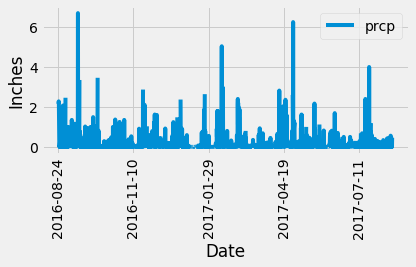

In [35]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
dt_recent_date = dt.datetime.strptime(recent_date, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
prev_year = dt_recent_date - dt.timedelta(days= 365)

# Perform a query to retrieve the data and precipitation scores
prev_year_data = session.query(Measurement).\
                    filter(Measurement.date > prev_year)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql_query(sqlalchemy.select([Measurement.date, Measurement.prcp]).where(Measurement.date > prev_year),
 con = engine, index_col = 'date')

# Sort the dataframe by date
df = df.sort_values(by = 'date')

# Use Pandas Plotting with Matplotlib to plot the data

df.reset_index().plot(x = 'date', y ='prcp')
plt.xticks(rotation= 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()



In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.station).count()
print(total_stations)

9


In [58]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active_stations = session.query(Measurement.station , func.count(Measurement.station)).\
                                   order_by (func.count(Measurement.station).desc()).\
                                    group_by(Measurement.station).all()
print(most_active_station)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [65]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station_id = most_active_stations[0][0]
print(most_active_station_id )

# lowest temp
lowest_temp = session.query(func.min(Measurement.tobs)).\
                filter(Measurement.station == most_active_station_id).all()
print(lowest_temp)
# highest temp
highest_temp = session.query(func.max(Measurement.tobs)).\
                filter(Measurement.station == most_active_station_id).all()
print(highest_temp)

# avg temp
avg_temp = session.query(func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_active_station_id).all()
print(avg_temp)


USC00519281
[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


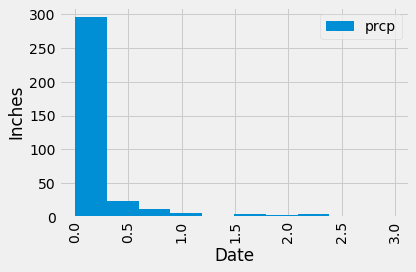

In [70]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df_active_station = pd.read_sql_query(sqlalchemy.select([Measurement.date, Measurement.prcp]).where(Measurement.date > prev_year, Measurement.station == most_active_station_id),
 con = engine, index_col = 'date')

df_active_station = df_active_station.sort_values(by = 'date')

df_active_station.reset_index().plot.hist(x = 'date', y ='prcp')
plt.xticks(rotation= 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()


# Close session

In [16]:
# Close Session
session.close()